In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("MSFTn.csv")

In [3]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-11,105.349998,108.930000,104.199997,105.910004,100.342461,63904300
1,2018-10-12,109.010002,111.239998,107.120003,109.570000,103.810066,47742100
2,2018-10-15,108.910004,109.480003,106.949997,107.599998,101.943626,32068100
3,2018-10-16,109.540001,111.410004,108.949997,111.000000,105.164894,31610200
4,2018-10-17,111.680000,111.809998,109.550003,110.709999,104.890144,26548200
...,...,...,...,...,...,...,...
1251,2023-10-03,320.829987,321.390015,311.209991,313.390015,313.390015,21033500
1252,2023-10-04,314.029999,320.040009,314.000000,318.959991,318.959991,20720100
1253,2023-10-05,319.089996,319.980011,314.899994,319.359985,319.359985,16965600
1254,2023-10-06,316.549988,329.190002,316.299988,327.260010,327.260010,25645500


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2018-10-11,105.910004
1,2018-10-12,109.570000
2,2018-10-15,107.599998
3,2018-10-16,111.000000
4,2018-10-17,110.709999
...,...,...
1251,2023-10-03,313.390015
1252,2023-10-04,318.959991
1253,2023-10-05,319.359985
1254,2023-10-06,327.260010


In [5]:
df['Date']

0       2018-10-11
1       2018-10-12
2       2018-10-15
3       2018-10-16
4       2018-10-17
           ...    
1251    2023-10-03
1252    2023-10-04
1253    2023-10-05
1254    2023-10-06
1255    2023-10-09
Name: Date, Length: 1256, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2018-10-11')
datetime_object

datetime.datetime(2018, 10, 11, 0, 0)

In [7]:
df

,Date,Close
0,2018-10-11,105.910004
1,2018-10-12,109.570000
2,2018-10-15,107.599998
3,2018-10-16,111.000000
4,2018-10-17,110.709999
...,...,...
1251,2023-10-03,313.390015
1252,2023-10-04,318.959991
1253,2023-10-05,319.359985
1254,2023-10-06,327.260010


In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\himan\AppData\Local\Temp\ipykernel_8580\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2018-10-11
1      2018-10-12
2      2018-10-15
3      2018-10-16
4      2018-10-17
          ...    
1251   2023-10-03
1252   2023-10-04
1253   2023-10-05
1254   2023-10-06
1255   2023-10-09
Name: Date, Length: 1256, dtype: datetime64[ns]

In [9]:
df.index = df.pop('Date')
df

,Close
Date,
2018-10-11,105.910004
2018-10-12,109.570000
2018-10-15,107.599998
2018-10-16,111.000000
2018-10-17,110.709999
...,...
2023-10-03,313.390015
2023-10-04,318.959991
2023-10-05,319.359985


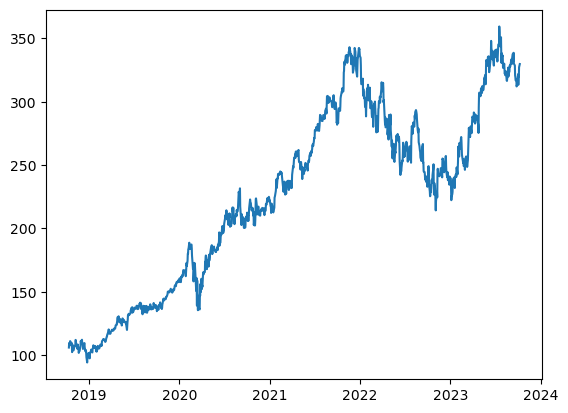

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df
# Start day second time around: '2018-10-16'
windowed_df = df_to_windowed_df(df, 
                                '2018-10-16', 
                                '2023-10-09', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2018-10-16,105.910004,109.570000,107.599998,111.000000
1,2018-10-17,109.570000,107.599998,111.000000,110.709999
2,2018-10-18,107.599998,111.000000,110.709999,108.500000
3,2018-10-19,111.000000,110.709999,108.500000,108.660004
4,2018-10-22,110.709999,108.500000,108.660004,109.629997
...,...,...,...,...,...
1248,2023-10-03,313.640015,315.750000,321.799988,313.390015
1249,2023-10-04,315.750000,321.799988,313.390015,318.959991
1250,2023-10-05,321.799988,313.390015,318.959991,319.359985
1251,2023-10-06,313.390015,318.959991,319.359985,327.260010


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((1253,), (1253, 3, 1), (1253,))

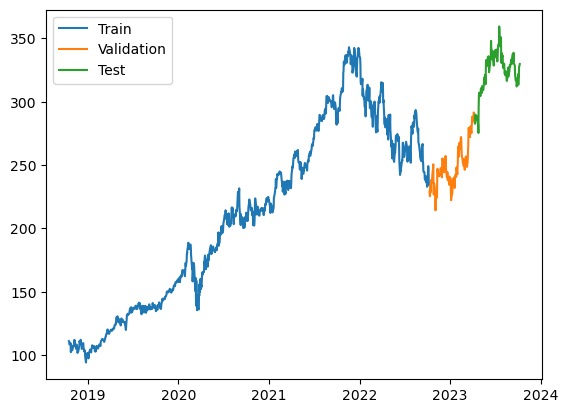

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 23ms/step - loss: 48837.8203 - mean_absolute_error: 209.7806 - val_loss: 61959.5352 - val_mean_absolute_error: 248.3362
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 48140.4609 - mean_absolute_error: 208.1065 - val_loss: 60626.8359 - val_mean_absolute_error: 245.6371
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 44571.9297 - mean_absolute_error: 199.2191 - val_loss: 51248.2656 - val_mean_absolute_error: 225.7318
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 31542.6758 - mean_absolute_error: 162.9552 - val_loss: 28562.1953 - val_mean_absolute_error: 168.1165
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 12646.7617 - mean_absolute_error: 92.5288 - val_loss: 6490.0459 - val_mean_absolute_error: 78.7491
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 5163.6357 - mean_absolute_error: 62.2466 - val_loss: 1

32/32 [==============================] - 0s 6ms/step - loss: 18.0168 - mean_absolute_error: 3.0574 - val_loss: 31.8359 - val_mean_absolute_error: 4.5109
Epoch 51/100
32/32 [==============================] - 0s 6ms/step - loss: 18.9359 - mean_absolute_error: 3.2260 - val_loss: 31.0505 - val_mean_absolute_error: 4.3415
Epoch 52/100
32/32 [==============================] - 0s 6ms/step - loss: 18.1717 - mean_absolute_error: 3.0858 - val_loss: 29.3091 - val_mean_absolute_error: 4.1995
Epoch 53/100
32/32 [==============================] - 0s 6ms/step - loss: 18.5887 - mean_absolute_error: 3.1418 - val_loss: 30.9532 - val_mean_absolute_error: 4.3491
Epoch 54/100
32/32 [==============================] - 0s 6ms/step - loss: 19.6826 - mean_absolute_error: 3.2175 - val_loss: 29.9777 - val_mean_absolute_error: 4.2026
Epoch 55/100
32/32 [==============================] - 0s 6ms/step - loss: 19.6939 - mean_absolute_error: 3.2448 - val_loss: 37.1882 - val_mean_absolute_error: 4.9172
Epoch 56/100
32/3

32/32 [==============================] - 0s 2ms/step


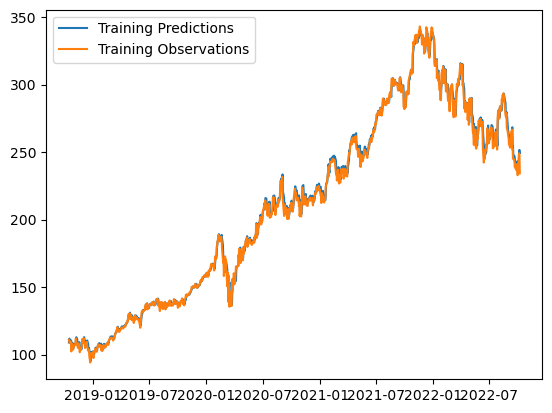

In [25]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

4/4 [==============================] - 0s 1ms/step


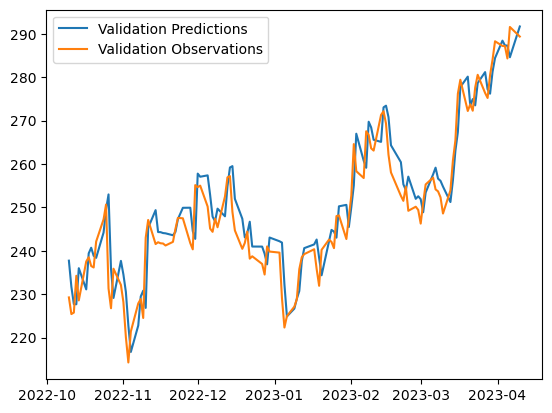

In [24]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

4/4 [==============================] - 0s 2ms/step


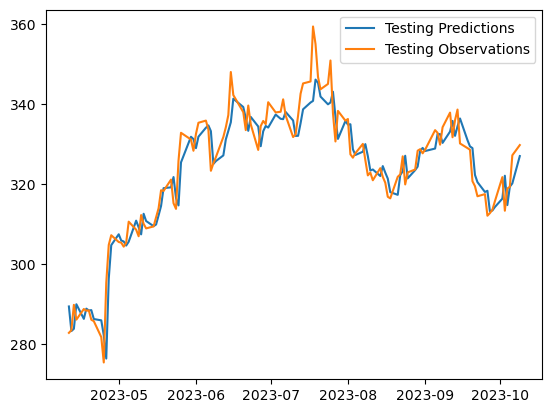

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

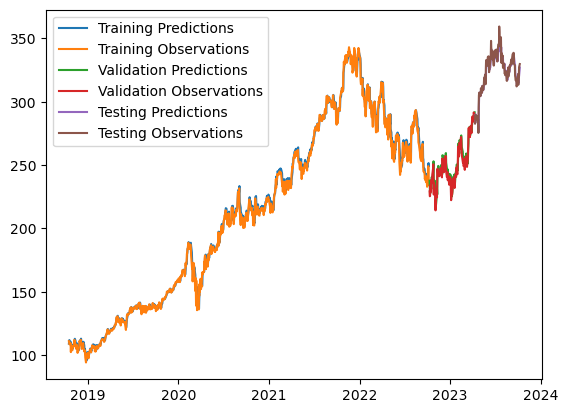

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [19]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 34ms/step


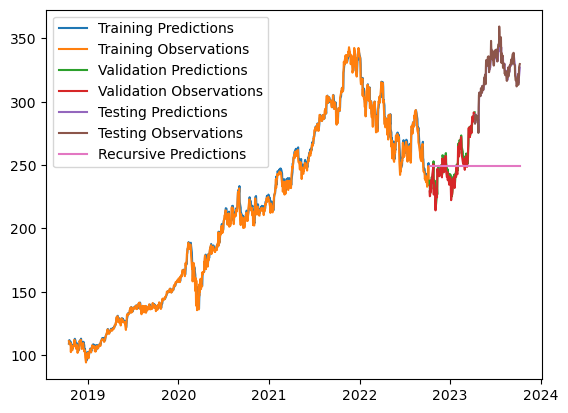

In [20]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])